In [1]:
%matplotlib inline

import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display
import utils

import warnings 
warnings.filterwarnings('always')   #suppresses all warnings
warnings.filterwarnings('ignore')

In [2]:
tracks= utils.load("/Users/david/Desktop/DM2 project/fma_metadata/tracks.csv")
tracks_cut=['album','artist']
tracks.drop(tracks_cut,axis=1,inplace=True)
tracks=tracks.droplevel(0,axis=1)
tracks.drop(index=tracks[tracks.subset=='large'].index, inplace=True)
tracks_cut=['composer','comments', 'date_created','date_recorded',
            'license','number','title','language_code',
            'publisher', 'tags','information','lyricist','genres','genres_all',
            'favorites','listens','interest','bit_rate', 'duration','split','subset']
tracks.drop(tracks_cut,axis=1,inplace=True)

In [3]:
#estrazioni da librosa_mp3 di 10  secondi dopo i primi 10 features rolloff
ts=pd.read_csv("/Users/david/Desktop/DM2 project/fma_metadata/ts_centroid.csv")
ts.shape

(1028, 1209)

In [4]:
ts_df=pd.merge(tracks,ts, on='track_id')
ts_df.head()

,track_id,genre_top,Unnamed: 0,Unnamed: 0.1,0,1,2,3,4,5,...,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205
0,4850,Classical,13,206,0.203188,0.177222,0.170356,0.174893,0.181088,0.179945,...,0.429477,0.438678,0.423448,0.416010,0.414990,0.434620,0.557168,0.779985,0.852099,0.806474
1,4851,Classical,14,207,0.139737,0.162770,0.188715,0.196280,0.222101,0.236519,...,0.100511,0.092096,0.077473,0.062344,0.058620,0.039428,0.035532,0.036547,0.003289,0.039476
2,5009,Old-Time / Historic,15,208,0.097878,0.141881,0.181742,0.295769,0.343891,0.415385,...,0.396982,0.354043,0.370011,0.368628,0.309365,0.282796,0.272292,0.276301,0.301752,0.270572
3,5012,Old-Time / Historic,16,209,0.088058,0.103542,0.167626,0.233723,0.334451,0.458624,...,0.291008,0.467978,0.473676,0.195546,0.092509,0.263610,0.330493,0.367824,0.399824,0.282295
4,5013,Old-Time / Historic,17,210,0.134297,0.198303,0.286986,0.377489,0.289663,0.278561,...,0.469473,0.409380,0.320596,0.243092,0.350757,0.478701,0.517602,0.362054,0.187761,0.319275


# Check genres

In [5]:
tracks[tracks['genre_top']=='Old-Time / Historic'].head(2)

,genre_top
track_id,
5009,Old-Time / Historic
5012,Old-Time / Historic


In [6]:
# find index from Old-Time / Historic track
ts_df.loc[ts_df.track_id == 5012]

,track_id,genre_top,Unnamed: 0,Unnamed: 0.1,0,1,2,3,4,5,...,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205
3,5012,Old-Time / Historic,16,209,0.088058,0.103542,0.167626,0.233723,0.334451,0.458624,...,0.291008,0.467978,0.473676,0.195546,0.092509,0.26361,0.330493,0.367824,0.399824,0.282295


In [7]:
tracks[tracks['genre_top']=='Classical'].head(2)

,genre_top
track_id,
4850,Classical
4851,Classical


In [8]:
# find index from Classical track
ts_df.loc[ts_df.track_id == 4850]

,track_id,genre_top,Unnamed: 0,Unnamed: 0.1,0,1,2,3,4,5,...,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205
0,4850,Classical,13,206,0.203188,0.177222,0.170356,0.174893,0.181088,0.179945,...,0.429477,0.438678,0.423448,0.41601,0.41499,0.43462,0.557168,0.779985,0.852099,0.806474


In [9]:
cut_columns=['track_id','Unnamed: 0','Unnamed: 0.1']
ts.drop(cut_columns, axis=1, inplace=True)

In [10]:
ts.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205
0,0.203188,0.177222,0.170356,0.174893,0.181088,0.179945,0.180785,0.181348,0.175140,0.177304,...,0.429477,0.438678,0.423448,0.416010,0.414990,0.434620,0.557168,0.779985,0.852099,0.806474
1,0.139737,0.162770,0.188715,0.196280,0.222101,0.236519,0.235485,0.234684,0.237329,0.223463,...,0.100511,0.092096,0.077473,0.062344,0.058620,0.039428,0.035532,0.036547,0.003289,0.039476
2,0.097878,0.141881,0.181742,0.295769,0.343891,0.415385,0.524990,0.526107,0.438027,0.430539,...,0.396982,0.354043,0.370011,0.368628,0.309365,0.282796,0.272292,0.276301,0.301752,0.270572
3,0.088058,0.103542,0.167626,0.233723,0.334451,0.458624,0.421045,0.172120,0.230144,0.366459,...,0.291008,0.467978,0.473676,0.195546,0.092509,0.263610,0.330493,0.367824,0.399824,0.282295
4,0.134297,0.198303,0.286986,0.377489,0.289663,0.278561,0.435295,0.430005,0.354197,0.245915,...,0.469473,0.409380,0.320596,0.243092,0.350757,0.478701,0.517602,0.362054,0.187761,0.319275


# Matrix Profile

In [11]:
from matrixprofile import *

In [12]:
#Old-Time/Historic track
ts1=ts.loc[[2]] 
ts2=ts.loc[[3]]   

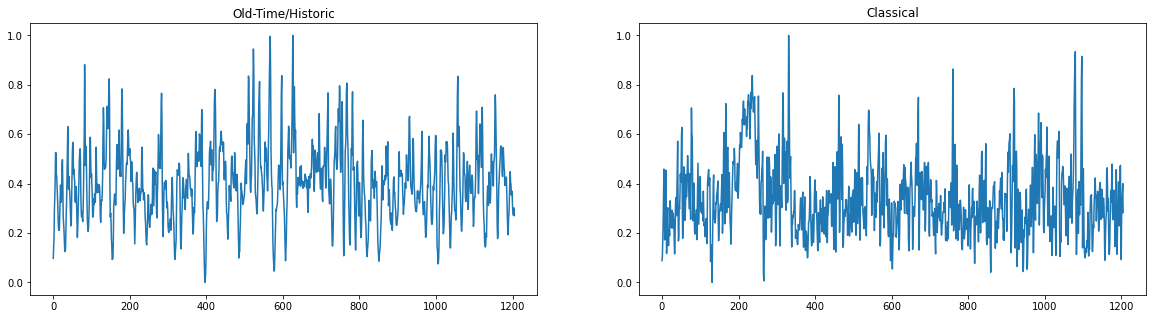

In [13]:
fig,ax = plt.subplots(1,2, figsize=(20,5))
ax[0].plot(np.squeeze(ts1.to_numpy().T))
ax[0].set_title('Old-Time/Historic')
ax[1].plot(np.squeeze(ts2.to_numpy().T))
ax[1].set_title('Classical')

plt.show()

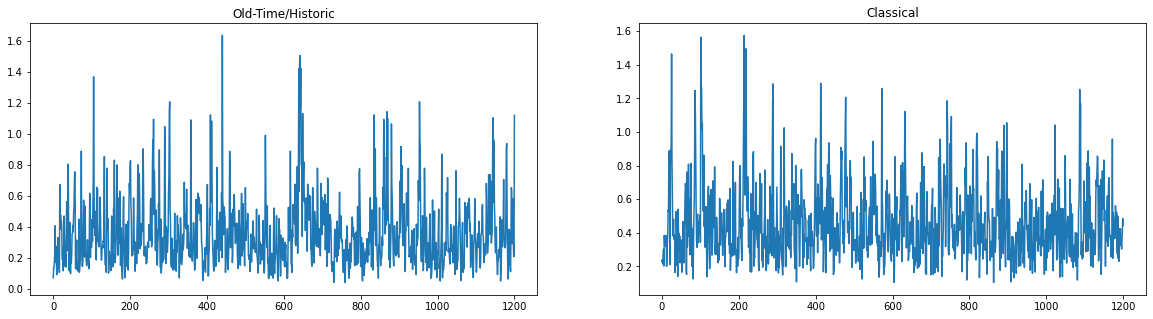

In [14]:
w = 6
mp1, mpi1 = matrixProfile.stomp((np.squeeze(ts1.to_numpy()).T), w)
mp2, mpi2 =matrixProfile.stomp((np.squeeze(ts2.to_numpy()).T), w)


fig,ax=plt.subplots(1,2,figsize=(20,5))
ax[0].plot(mp1)
ax[0].set_title('Old-Time/Historic')
ax[1].plot(mp2)
ax[1].set_title('Classical')

plt.show()

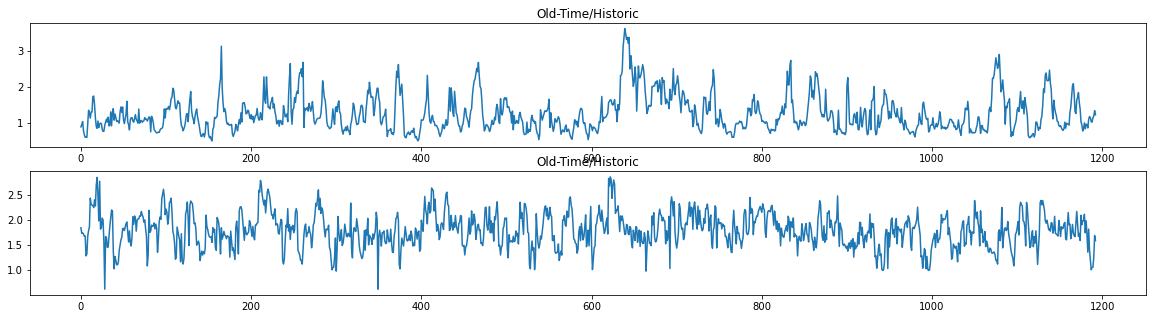

In [25]:
w = 14
mp1, mpi1 = matrixProfile.stomp((np.squeeze(ts1.to_numpy()).T), w)
mp2, mpi2 =matrixProfile.stomp((np.squeeze(ts2.to_numpy()).T), w)

fig,ax=plt.subplots(2,1,figsize=(20,5))
ax[0].plot(mp1)
ax[0].set_title('Old-Time/Historic')
ax[1].plot(mp2)
ax[1].set_title('Old-Time/Historic')

plt.show()

# Motif Discovery

## Old Time 

In [16]:
mo1, mod1  = motifs.motifs(np.squeeze(ts1.to_numpy().T), (mp1, mpi1), max_motifs=3)
mo2, mod2 = motifs.motifs(np.squeeze(ts2.to_numpy().T), (mp2,mpi2) ,max_motifs=3)

In [26]:
print('Old-Time / Historic motif track1:',mo1)
print('Old-Time / Historic motif track2:',mo2)

Old-Time / Historic motif track1: [[390, 768], [68, 178, 448, 998]]
Old-Time / Historic motif track2: [[30, 351], [596, 1065], [48, 302, 511, 666]]


In [27]:
print('Old-Time/Historic mod track1:',mod1)
print('Old-Time/Historic mod track2:',mod2)

Old-Time/Historic mod track1: [0.35264515830095117, 0.4338924105128095]
Old-Time/Historic mod track2: [0.5272652864538617, 0.5650266398324875, 0.7744393231300291]


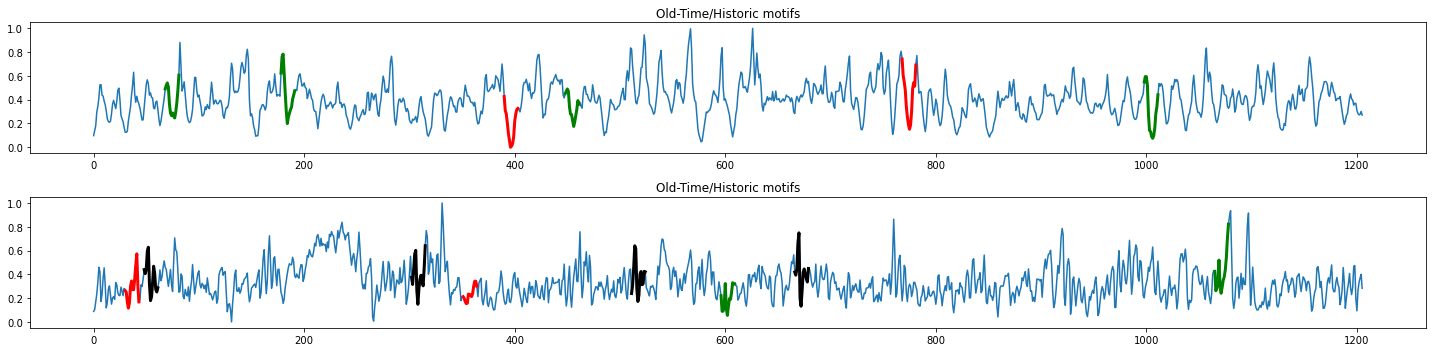

In [28]:
fig,ax=plt.subplots(2,1,figsize=(20,5))
ax[0].plot(np.squeeze(ts1.to_numpy().T))
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo1)]
for m, d, c in zip(mo1, mod1, colors):
    for i in m:
        m_shape = ts1.T.values[i:i+w]
        ax[0].plot(range(i,i+w), m_shape, color=c, lw=3)
        ax[0].set_title('Old-Time/Historic motifs')
ax[1].plot(np.squeeze(ts2.to_numpy().T))
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo2)]
for m, d, c in zip(mo2, mod2, colors):
    for i in m:
        m_shape = ts2.T.values[i:i+w]
        ax[1].plot(range(i,i+w), m_shape, color=c, lw=3)
        ax[1].set_title('Old-Time/Historic motifs')

plt.tight_layout()
plt.show()

# Anomaly Discovery

In [20]:
from matrixprofile.discords import discords

In [21]:
anoms1 = discords(mp1, ex_zone=3, k=3)
anoms2 = discords(mp2, ex_zone=3, k=3)

In [29]:
print('Old-Time/Historic discords:',anoms1)
print('Old-Time/Historic discords:',anoms2)

Old-Time/Historic discords: [640 644 858]
Old-Time/Historic discords: [214 627 100]


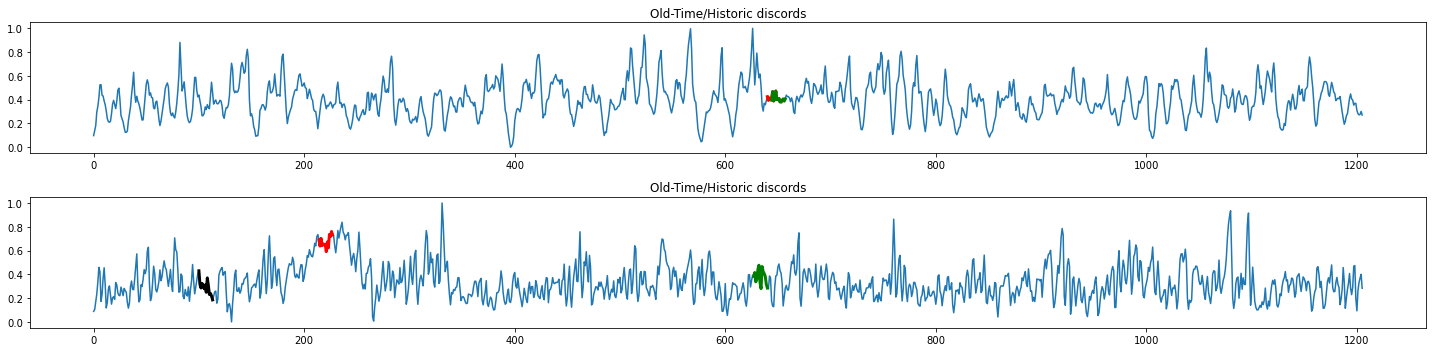

In [30]:
fig,ax=plt.subplots(2,1,figsize=(20,5))
ax[0].plot(np.squeeze(ts1.to_numpy().T))
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo1)]
for a, c in zip(anoms1, colors):
    a_shape = ts1.T.values[a:a+w]
    ax[0].plot(range(a, a+w), a_shape, color=c, lw=3)
    ax[0].set_title('Old-Time/Historic discords')

ax[1].plot(np.squeeze(ts2.to_numpy().T))
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo2)]
for a, c in zip(anoms2, colors):
    a_shape = ts2.T.values[a:a+w]
    ax[1].plot(range(a, a+w), a_shape, color=c, lw=3)
    ax[1].set_title('Old-Time/Historic discords')
    
plt.tight_layout()    
plt.show()